<a href="https://colab.research.google.com/github/ProteintechLab/imageanalysis/blob/main/Image_Segmentation_Data_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting up the environment

In [ ]:
# Importing necessary modules
import sys
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
import numpy as np
import pandas as pd
import warnings

parent_folder_path = r"https://github.com/ProteintechLab/imageanalysis"
##sys.path.append(str(Path.cwd().parent))
sys.path.append(parent_folder_path)

In [ ]:
#Load the dataframe. In this case, the data is stored on the Proteintech Github.
df = pd.read_csv("https://raw.githubusercontent.com/ProteintechLab/imageanalysis/main/DATA.txt", delimiter="\t")

In [ ]:
# For this tutorial, I will add a column named Experiment. Here the values of the rows can be either Exp 1, Exp 2 or Exp 3
# to mimic a dataset where you have three repeats of the experiment.

num_rows = len(df)

# List of possible values
exp = ['Exp1', 'Exp2', 'Exp3']

# Generate random values within the specified ranges
random_values = np.random.choice(exp, size=num_rows)

# Add the random values as a new column to the DataFrame
df['Experiment'] = random_values


#### Now we can start looking at the data. In this case the table we get has a lot of data columns that we might not want to use at the same time. To simplify the dataframe with what we want, we can remove the unwanted columns.

In [ ]:
# Remove any unwated columns. In this case we want the mean intensity of the markers, the Normalised Coordinate X and Y
# (and Z) if you have it, the Image Name (usefull if you have multiple images), volume (can be used to count the number of
# rows that obey a certain parameter) and the experiment columns.

# State your markers
markers = ["SOX2", "SOX17", "TBXT", "LMBR"]

# Filter columns based on the markers
desired_columns = [f"Mean Intensity {marker}" for marker in markers]

# Add additional columns like Normalized Coordinates and Image Name if needed
desired_columns += ["Normalised Coordinate 0", "Normalised Coordinate 1", "Image Name", "volume", "Experiment"]

# Keep only the desired columns in the DataFrame
df = df[desired_columns]
df

,Mean Intensity SOX2,Mean Intensity SOX17,Mean Intensity TBXT,Mean Intensity LMBR,Normalised Coordinate 0,Normalised Coordinate 1,Image Name,volume,Experiment
0,2960.210526,1043.755149,1077.151030,3244.343249,115.351292,162.271722,NMP Image Mine.tiff,184.6325,Exp2
1,1428.315625,807.800000,1082.037500,3265.378125,106.470267,-10.044918,NMP Image Mine.tiff,135.2000,Exp3
2,1558.791971,814.328467,888.839416,2875.521898,63.406137,63.080630,NMP Image Mine.tiff,115.7650,Exp1
3,3193.826625,937.795666,1005.055728,4338.226006,-105.647133,-128.711028,NMP Image Mine.tiff,136.4675,Exp3
4,1837.231092,781.168067,894.151261,3107.147059,295.159225,157.519534,NMP Image Mine.tiff,100.5550,Exp2
...,...,...,...,...,...,...,...,...,...
671,3038.846890,861.952153,931.382775,3104.636364,-106.365371,-279.212280,NMP Image Mine.tiff,88.3025,Exp2
672,1105.122642,795.556604,959.014151,2966.183962,94.185038,9.514601,NMP Image Mine.tiff,89.5700,Exp3
673,3184.414141,806.188552,911.080808,3146.319865,-129.578423,-202.304598,NMP Image Mine.tiff,125.4825,Exp3
674,3090.223433,804.250681,885.444142,2936.923706,93.923397,-151.825576,NMP Image Mine.tiff,155.0575,Exp2


In [ ]:
# We can add a condition column in case there are several conditions. This will be easiest when having to do it if done using
# the image Name column. Each Image Name could be a different condition, of say all your images of condition 1 have C1 in
# their name, then you can state that if image name has c1 in it, it will assign C1 in the condition column, and if Image
# name has C2 then it will assign C2 in the condition column.
# In this case I only have one condition but it will make it easier for later.

df['Condition'] = 'NMP'


<ipython-input-11-4803c35476b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition'] = 'NMP'


## Now we can look at different data from the table.
## Lets start with Cell Numbers of Each Experiment.

<ipython-input-12-0195a71676b6>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')


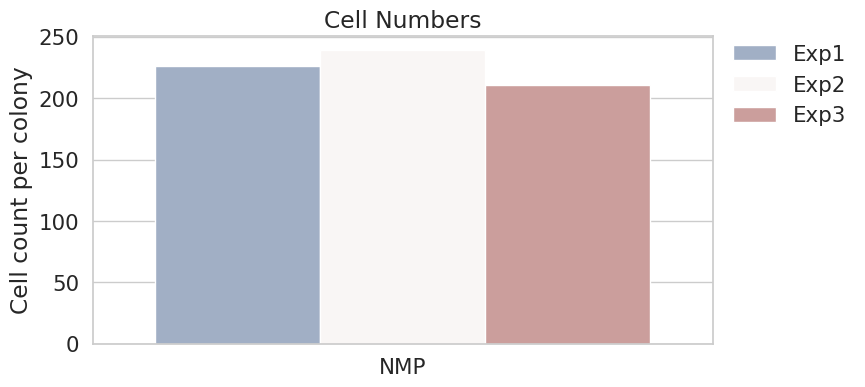

In [ ]:
# We will use the seaborn library to plot all the graphs. We therefore need to import it here at the beggining. If
# it has been used before, then we do not need to do it.
import seaborn as sns
import matplotlib.pyplot as plt

# Here we want to create a temporary dataframe Box_df that will be used to plot the cell numbers.
# We want to group the rows by their Image Name, Condition and Experiment. And we then want to count the number of rows in
# each group. We do this by counting the number of rows with the volume in each.
box_df = df.groupby(['Image Name', "Condition","Experiment"])['volume'].count().rename('Count').reset_index()

# Now we want to initialise the figure
# Set the sie of the figure in x and y coordinate.
sns.set(rc={'figure.figsize': (8, 4)})
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

# Now we plot the barplot (or other type of plot such as boxplot etc). We use hue to differentiate the different experiments
# so we get a barplot for each experiment.
ax = sns.barplot(x='Condition', y='Count', data=box_df,hue="Experiment", palette='vlag', linewidth=1,  dodge=True)

# Tweak the visual presentation
ax.set(title='Cell Numbers')
ax.set(xlabel='')
ax.set(ylabel='Cell count per colony')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.legend(title='', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, frameon=False)

plt.show()

## Normalise intensities

##### Now we can normalise the intensities of the markers. In this case , we have the following markers: SOX2, SOX17, TBXT and LMBR. We can normalise to LMBR as this is the nuclear marker and should be the constant one specially if you have different conditions.

In [ ]:
for m in markers :
    df["Mean Intensity " + m] = df["Mean Intensity " + m] / np.log(df["Mean Intensity LMBR"])

## Analysis of markers expression levels

### Box plots

In [ ]:
# Create a reusable function to generate boxplots of intensities
def boxplots_markers(df, markers, x_dim, x_ordr, hue_dim=None, hue_ordr=None, threshs=None, fig_dims=None) :

    # Adjust fonts
    plt.rcParams["axes.labelsize"] = 22
    sns.set(font_scale = 1.5)
    sns.set_style("ticks") # specifies that we want axes ticks to be shown


    # Create the figure for aligning the plots
    # first calculate the figure width:
    if(fig_dims==None): fig_dims = (len(markers)*len(x_dim),4)

    f, axs = plt.subplots(1, len(markers), figsize=fig_dims, sharey=False)


    # Create one plot per marker
    for b in range (len(markers)):
        # Initialize the figure with a logarithmic y axis
        axs[b].set_yscale("log")

        if(hue_dim == None):
            sns.boxplot(x=x_dim, y="Mean Intensity "+markers[b], hue=hue_dim, data=df,
                    palette="vlag", order=x_ordr, hue_order=hue_ordr, ax=axs[b], showfliers = False).set(title=markers[b])
        else:
            sns.boxplot(x=x_dim, y="Mean Intensity "+markers[b], hue=hue_dim, data=df,
                    palette="vlag", order=x_ordr, hue_order=hue_ordr, ax=axs[b], showfliers = False).set(title=markers[b])

        # Add in points to show each observation
        #sns.stripplot(x="Conditions", y="Mean Intensity "+markers[b], data=df,
        #              size=2, color=".2", alpha=0.1, linewidth=0, ax=axs[b])

        # Tweak the visual presentation
        axs[b].set(xlabel="")
        axs[b].set(ylabel="Mean Intensity (A.U.)")
        axs[b].set_xticklabels(axs[b].get_xticklabels(),rotation = 40)

        # Add the threshold
        if(threshs != None):
            axs[b].axhline(threshs[b],0,1)

        if(hue_dim != None):
            if b == len(markers)-1:
                axs[b].legend(title="", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
            else:
                axs[b].legend([],[], frameon=False)


    f.tight_layout() # This fixes the spacing between individual plots

### Scatter plots

In [ ]:
# Function to plot scatter plots with three markers either in a row or grid layout
def scatters_3_markers(df, markers, x_column, x_categories,
                       y_column=None, y_categories=None, threshs=None, c_mins=None, c_maxs=None,
                       alpha=0.4, linear=False):

    if y_column == None:
        # If only x_column is provided, plot in a row layout
        _scatters_3_markers_row(df, markers, x_column, x_categories, threshs, c_mins, c_maxs, alpha, linear)
    else:
        # If both x_column and y_column are provided, plot in a grid layout
        _scatters_3_markers_grid(df, markers, x_column, x_categories, y_column, y_categories, threshs, c_mins, c_maxs, alpha, linear)

    return


# Function to plot scatter plots in a row layout
def _scatters_3_markers_row(df, markers, x_column, x_categories, threshs=None, c_mins=None, c_maxs=None, alpha=0.15, linear=False):

    # Adjust fonts and set style
    plt.rcParams["axes.labelsize"] = 22
    sns.set_style("ticks")
    sns.set(font_scale=1.75)

    # Utility indices
    xIndex = 0
    yIndex = 1
    cIndex = 2  # color
    column = 0

    # Initialize the plots
    f, axs = plt.subplots(1, len(x_categories), figsize=(len(x_categories)*5, 5), sharex=True, sharey=True)

    # Initialize the figure with a logarithmic x and y axes if required
    if not linear:
        axs[column].set_xscale("log")
        axs[column].set_yscale("log")

    # Names for x and y axes
    x_name = "Mean Intensity " + markers[xIndex]
    y_name = "Mean Intensity " + markers[yIndex]

    # Build a color scale
    colormap = sns.color_palette("magma", as_cmap=True)
    norm = plt.Normalize(c_mins[cIndex], c_maxs[cIndex])
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])

    for t in x_categories:
        current = df.loc[(df[x_column]==t)]

        # Define the seaborn plot
        plot = sns.scatterplot(x=x_name, y=y_name, c=current["Mean Intensity " + markers[cIndex]],
                               vmin=c_mins[cIndex], vmax=c_maxs[cIndex],
                               cmap=colormap, data=current, s=15, alpha=alpha, linewidth=0, ax=axs[column], legend=False)

        # Add thresholds
        plot.axhline(threshs[yIndex], color=".4")
        plot.axvline(threshs[xIndex], color=".4")

        # Include percentages
        if len(current) != 0:
            # Upper left
            to_count = current[(current[x_name]<threshs[xIndex]) & (current[y_name]>= threshs[yIndex])][x_name]
            percentage = '{:.2f}%'.format(len(to_count) * 100 / len(current))
            plot.text(0.05, 0.9, percentage, transform=axs[column].transAxes)
            # Bottom left
            to_count = current[(current[x_name]<threshs[xIndex]) & (current[y_name]< threshs[yIndex])][x_name]
            percentage = '{:.2f}%'.format(len(to_count) * 100 / len(current))
            plot.text(0.05, 0.05, percentage, transform=axs[column].transAxes)
            # Bottom right
            to_count = current[(current[x_name]>=threshs[xIndex]) & (current[y_name]< threshs[yIndex])][x_name]
            percentage = '{:.2f}%'.format(len(to_count) * 100 / len(current))
            plot.text(0.65, 0.05, percentage, transform=axs[column].transAxes)
            # Upper right
            to_count = current[(current[x_name]>=threshs[xIndex]) & (current[y_name]>= threshs[yIndex])][x_name]
            percentage = '{:.2f}%'.format(len(to_count) * 100 / len(current))
            plot.text(0.65, 0.9, percentage, transform=axs[column].transAxes)

        # Add title for x_category
        axs[column].set(title = t)

        # Add color scale on the right hand side if last column
        if column == len(x_categories) - 1:
            cbar = f.colorbar(sm, ax=axs[column])
            cbar.set_ticks([])  # Remove ticks to gain space
            cbar.ax.get_yaxis().labelpad = 30
            cbar.ax.set_ylabel(markers[cIndex], rotation=270)

        # Update column index
        column += 1

    f.tight_layout()


<ipython-input-14-d67a6b2c88c5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[b].set_xticklabels(axs[b].get_xticklabels(),rotation = 40)
<ipython-input-14-d67a6b2c88c5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[b].set_xticklabels(axs[b].get_xticklabels(),rotation = 40)
<ipython-input-14-d67a6b2c88c5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[b].set_xticklabels(axs[b].get_xticklabels(),rotation = 40)
<ipython-input-14-d67a6b2c88c5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[b].set_xticklabels(axs[b].get_xticklabels(),rotation = 40)


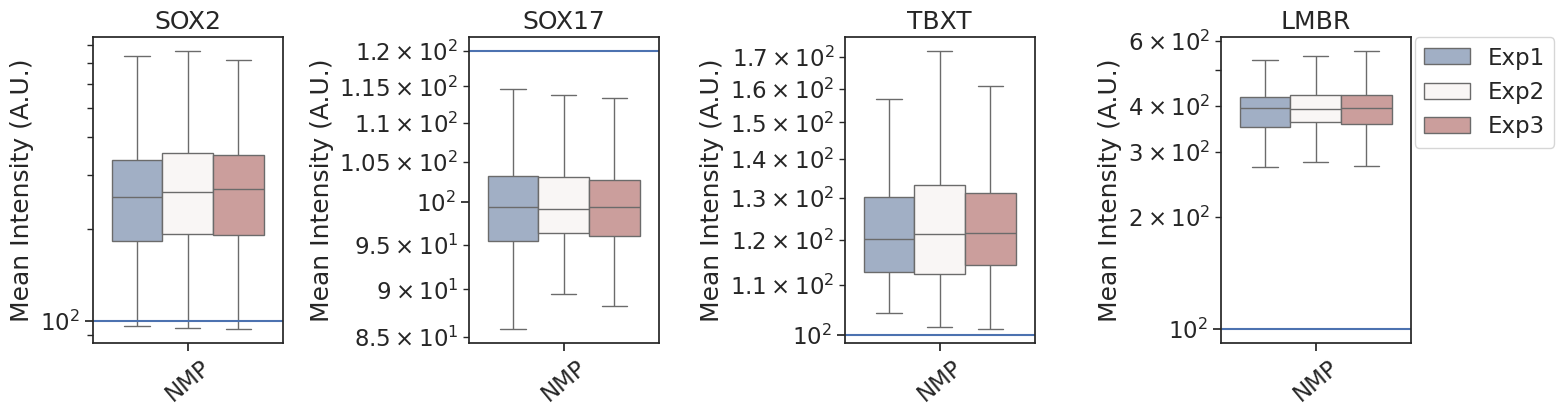

In [ ]:
# Define thresholds for gating (same order as markers)
m1_t = 100 #SOX2
m2_t= 120  #SOX17
m3_t= 100 #TBXT
m4_t= 100 #LMBR

conds = ["NMP"]
#boxplots_markers(df, markers, "Times", times, "Conditions", conds, threshs=[m1_t,m2_t,m3_t,m4_t], fig_dims=(22,4.5))
boxplots_markers(df, markers, "Condition", conds, "Experiment", exp, threshs=[m1_t,m2_t,m3_t,m4_t], fig_dims=(16,4.5))

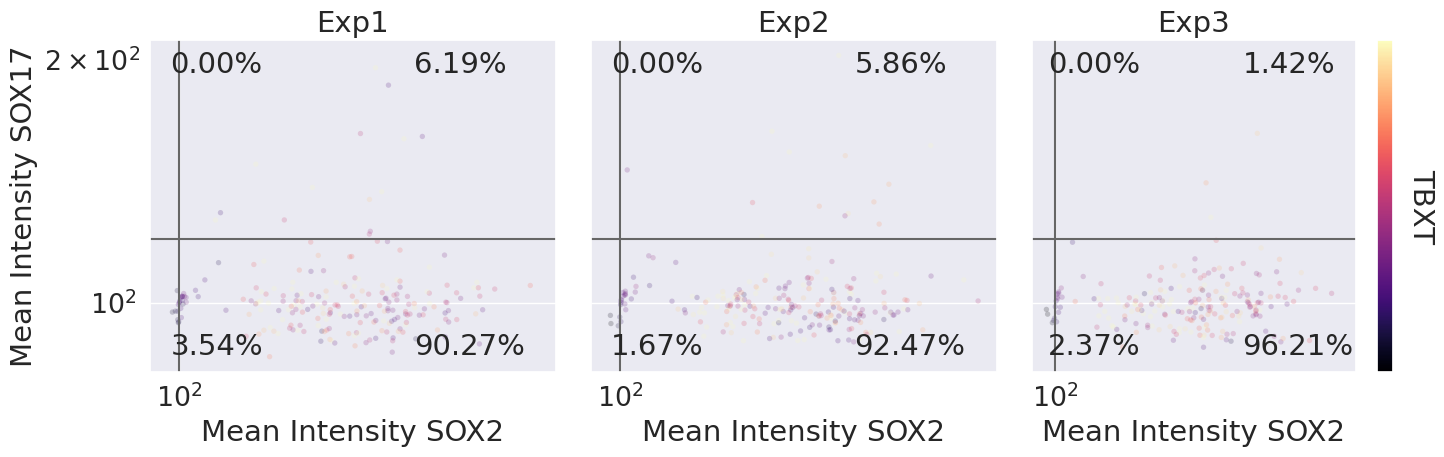

In [ ]:
# Define colours limits (same order as markers)
c_mins = [df['Mean Intensity '+x].min() for x in markers]
c_maxs = [df['Mean Intensity '+x].max()*0.6 for x in markers]


# Showing scatters plots
scatters_3_markers(df, markers, "Experiment", exp, threshs=[m1_t,m2_t,m3_t], c_mins=c_mins, c_maxs=c_maxs, alpha =0.2)
x_name = "Mean Intensity "+markers[0]
y_name = "Mean Intensity "+markers[1]

# After running these cells, you might need to modify the gating, for example here I know I dont have any SOX17 as
# therefore the gating for this will be so that the SOX17 threshold is above all the dots (cells).
# The best way to do this will be to have positive and negative controls on the stainings, as you would do with FACS.
# To modify the thresholds go to the above cell of code and change the values, re-run these cells as many times as
# needed.

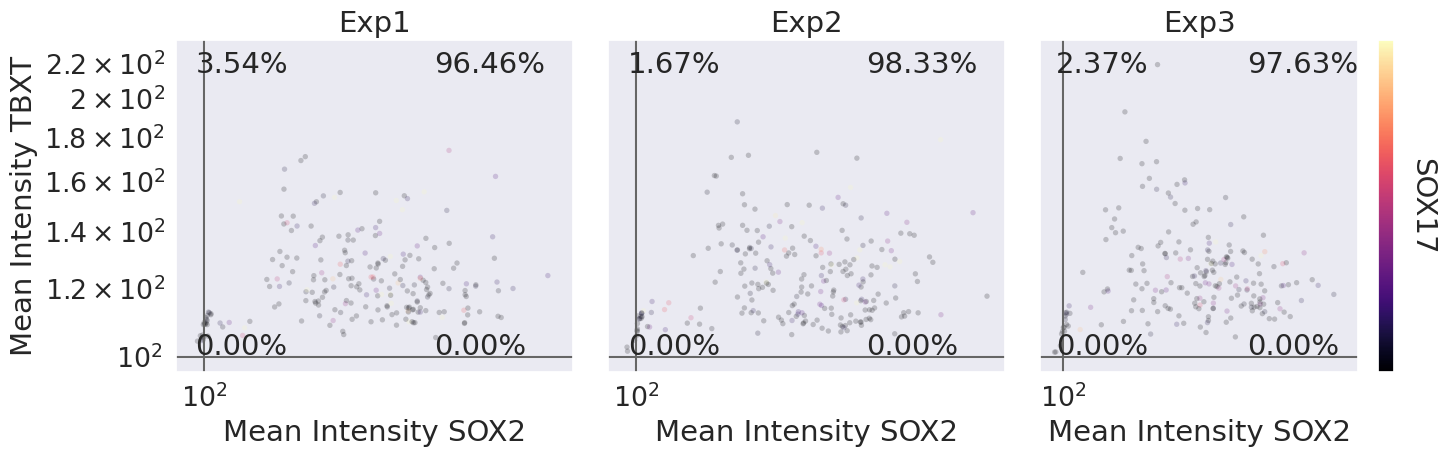

In [ ]:
# Changing the order of the axes
c_maxs = [c_maxs[0], c_maxs[2], c_maxs[1]]
scatters_3_markers(df, [markers[0], markers[2], markers[1]],"Experiment", exp, threshs=[m1_t, m3_t, m2_t], c_mins=c_mins, c_maxs=c_maxs, alpha =0.2)

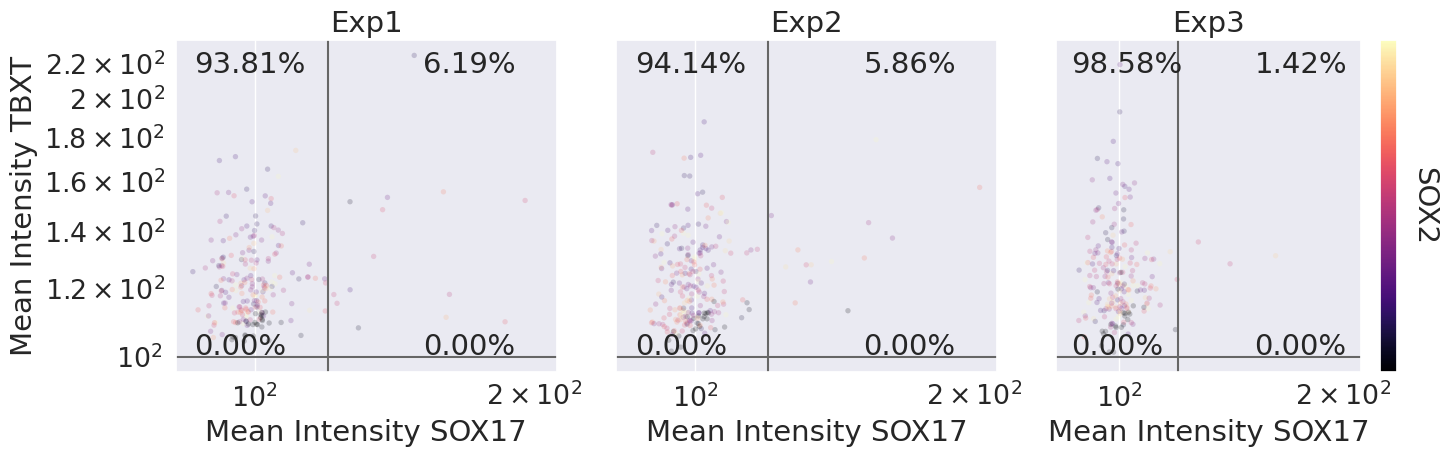

In [ ]:
# Changing the order of the axes
c_maxs = [c_maxs[1], c_maxs[2], c_maxs[0]]
scatters_3_markers(df, [markers[1], markers[2], markers[0]], "Experiment", exp, threshs=[m2_t, m3_t, m1_t], c_mins=c_mins, c_maxs=c_maxs, alpha =0.2)

## Analysis of the proportion of each cell population (Threshold based)

In [ ]:
import numpy as np

def assign_cell_identities(df, markers, threshs):
    # Iterate over markers
    for marker in markers:
        # Set boolean value based on whether intensity is above threshold or not
        df[marker] = df["Mean Intensity " + marker] > threshs[markers.index(marker)]

    # Define predicates and choices based on the number of markers
    if len(markers) == 3:
        predicates = [
            df[markers[0]] & df[markers[1]] & df[markers[2]],
            df[markers[0]] & df[markers[1]] & ~df[markers[2]],
            df[markers[0]] & ~df[markers[1]] & ~df[markers[2]],
            df[markers[0]] & ~df[markers[1]] & df[markers[2]],
            ~df[markers[0]] & ~df[markers[1]] & df[markers[2]],
            ~df[markers[0]] & df[markers[1]] & df[markers[2]],
            ~df[markers[0]] & df[markers[1]] & ~df[markers[2]],
            ~df[markers[0]] & ~df[markers[1]] & ~df[markers[2]]
        ]
        choices = [
            "Triple+",
            markers[0] + "+/" + markers[1] + "+",
            markers[0],
            markers[0] + "+/" + markers[2] + "+",
            markers[2],
            markers[1] + "+/" + markers[2] + "+",
            markers[1],
            "Negative"
        ]
    elif len(markers) == 2:
        predicates = [
            df[markers[0]] & df[markers[1]],
            df[markers[0]] & ~df[markers[1]],
            ~df[markers[0]] & df[markers[1]],
            ~df[markers[0]] & ~df[markers[1]]
        ]
        choices = [
            "Double+",
            markers[0],
            markers[1],
            "Negative"
        ]

    # Add State column based on predicates and choices
    df['State'] = np.select(predicates, choices, default="Negative")

# Example usage
assign_cell_identities(df, markers[:3], [m1_t, m2_t, m3_t])
print(df["State"].unique())

['Triple+' 'SOX2+/TBXT+' 'TBXT']


In [ ]:
# Use this to merge states, explain why this was done.

#df.loc[(df.State == "SOX 2"), 'State'] = "SOX2"
#df.loc[(df.State == "SOX 17+/SOX 2+"), 'State'] = "SOX17"


print(df["State"].unique())

['Triple+' 'SOX2+/TBXT+' 'TBXT']


### Create stacked bar plots to show the proportion of each cell population (threshold method)

In [ ]:
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns

def stacked_barplots_single(df, x_dim, cmap=None, states_order=None):

    if states_order is None:
        states_order = df['State'].unique()
    x_categories = df[x_dim].unique()

    if cmap is None:
        cmap = "tab20"

    stack = pd.crosstab(index=df[x_dim], columns=df['State'], normalize="index")

    plot = stack.plot(kind='bar', stacked=True, cmap=cmap)

    plot.set(xlabel="")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center')
    plot.set(ylabel="Cell type proportion")
    plot.legend(title="", loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)


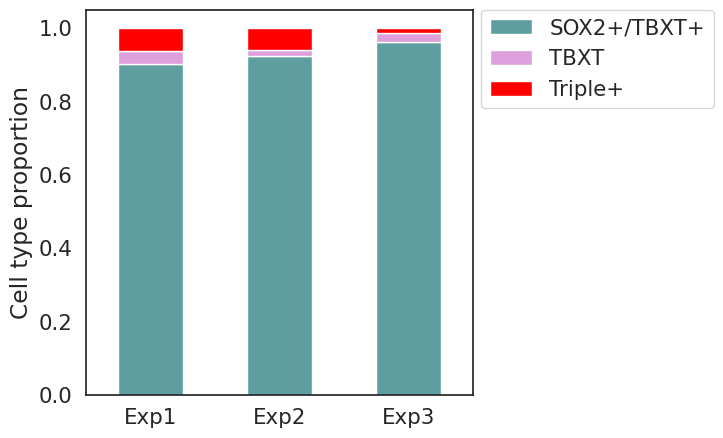

In [ ]:

#NB: The populations of interest need to be set manually, as this depends on each experiment
states_order = ['TBXT' ,'SOX2' ,'SOX2+/TBXT+', 'Triple+' ]


cmap = ListedColormap(["cadetblue", "slateblue", "plum", "red"])#, "slateblue","plum"])
#cmap = ListedColormap(["cadetblue", "slateblue", "black", "gold", "goldenrod", 'peru', "plum",  "rebeccapurple"])
#more colours 'peru', 'red', "goldenrod",  "plum", "rebeccapurple", "gold"
sns.set(rc = {'figure.figsize':(5, 5)})
sns.set(font_scale = 1.4)
sns.set_style("white")


stacked_barplots_single(df, x_dim="Experiment", cmap=cmap, states_order=states_order)
